In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [227]:
# https://www.kaggle.com/datasets/joshuanaude/effects-of-alcohol-on-student-performance/data

### Objetivo

Se buscará predecir "gpa_2023" que es el promedio de notas del estudiante para el 2023 (año actual del dataset)

In [181]:
df = pd.read_csv('./effects-alcohol.csv')

In [321]:
df.describe()

,high_school_gpa,gpa_2023,parental_approval_of_alcohol
count,406.000000,406.000000,406.000000
mean,77.989901,65.999778,0.889163
std,6.987439,8.135325,0.344309
min,34.000000,30.000000,0.000000
25%,74.000000,61.000000,1.000000
50%,78.000000,65.000000,1.000000
75%,83.000000,70.000000,1.000000
max,99.000000,95.220000,2.000000


In [182]:
renamed_columns = {
  "Timestamp": "survey_timestamp",
  "Your Sex?": "gender",
  "Your Matric (grade 12) Average/ GPA (in %)": "high_school_gpa",
  "What year were you in last year (2023) ?": "year_of_study_2023",
  "What faculty does your degree fall under?": "faculty",
  "Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)": "gpa_2023",
  "Your Accommodation Status Last Year (2023)": "accommodation_status_2023",
  "Monthly Allowance in 2023": "monthly_allowance_2023",
  "Were you on scholarship/bursary in 2023?": "scholarship_2023",
  "Additional amount of studying (in hrs) per week": "additional_study_hours",
  "How often do you go out partying/socialising during the week?": "partying_frequency",
  "On a night out, how many alcoholic drinks do you consume?": "alcohol_consumption_per_outing",
  "How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)": "alcohol_related_absences",
  "How many modules have you failed thus far into your studies?": "failed_modules",
  "Are you currently in a romantic relationship?": "in_a_relationship",
  "Do your parents approve alcohol consumption?": "parental_approval_of_alcohol",
  "How strong is your relationship with your parent/s?": "parent_relationship_strength"
}

df = df.rename(columns=renamed_columns)

In [156]:
df.head(3)

,survey_timestamp,gender,high_school_gpa,year_of_study_2023,faculty,gpa_2023,accommodation_status_2023,monthly_allowance_2023,scholarship_2023,additional_study_hours,How often do you go out partying/socialising during the week?,alcohol_consumption_per_outing,alcohol_related_absences,failed_modules,in_a_relationship,parental_approval_of_alcohol,parent_relationship_strength
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close


In [183]:
# Variables numéricas y categóricas
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

<AxesSubplot: >

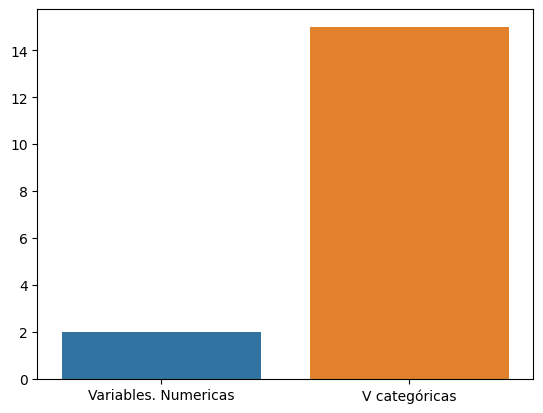

In [203]:
sns.barplot(x=['Variables. Numericas','V categóricas'],y=[len(numeric_features),len(categorical_features)])

In [257]:
def plot_categorical_countplot(df,column, labelRotation=0):
    plt.figure(figsize=(8, 6))  # Set the figure size
    sns.countplot(data=df, x=column, palette='viridis')

    # Adjust x-axis labels for readability
    plt.xlabel(column, fontsize=12)
    if labelRotation != 0:
        plt.xticks(rotation=labelRotation)
    plt.tight_layout()  # Adjust spacing after rotation

    plt.ylabel('Frequency', fontsize=12)

    plt.title(column, fontsize=14)

    plt.show()

In [216]:
def plot_numeric_feature(df,column):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Añade título al gráfico
    plt.title(column, fontsize=14)

    # Muestra el gráfico
    plt.show()
    
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=column)

    # Ajusta las etiquetas del eje x
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Añade título al gráfico
    plt.title(column, fontsize=14)

    # Muestra el gráfico
    plt.show()

In [185]:
# Valores nulos & Na
df.isnull().sum()

survey_timestamp                                                   0
gender                                                             2
high_school_gpa                                                    7
year_of_study_2023                                                73
faculty                                                            7
gpa_2023                                                          86
accommodation_status_2023                                         23
monthly_allowance_2023                                            31
scholarship_2023                                                   8
additional_study_hours                                             3
How often do you go out partying/socialising during the week?      2
alcohol_consumption_per_outing                                     2
alcohol_related_absences                                           3
failed_modules                                                     3
in_a_relationship                 

## Tratamiento de valores nulos
La mejor elección para trabajar con los valores nulos depende del tipo de variable, la cantidad de datos faltantes y el objetivo del análisis.

### Eliminación: 
Este método es simple y rápido pero puede reducir el tamaño del dataset y generar sesgos si los datos faltantes NO son aleatorios

### Elimina filas con valores nulos (no recomendado si hay muchos datos faltantes)
df_dropna = df.dropna()

### Elimina columnas con muchos valores nulos (establece un umbral)
df_thresh = df.dropna(thresh=0.8)  # Elimina columnas con más del 20% de datos faltantes

### imputación

Preserva el tamaño del dataset y permite utilizar todos los datos en el análisis. Puede introducir sesgos dependiendo del método que se utilice

Imputación con media / mediana / moda

```
# Imputa valores faltantes en 'gpa_2023' con la media
df['gpa_2023'].fillna(df['gpa_2023'].mean(), inplace=True)

# Imputa valores faltantes en 'additional_study_hours' con la moda (necesita transformaciones)
from scipy import stats
df['additional_study_hours'].fillna(stats.mode(df['additional_study_hours'])[0], inplace=True)
```

### Categorización
Es útil cuando se trata de variables categóricas con muchos valores faltantes únicos.

```
df['partying_frequency'].fillna('Desconocido', inplace=True)
df['alcohol_consumption_per_outing'].fillna('Desconocido', inplace=True)
```

> Para el dataset que proporcionaste, puedes considerar lo siguiente:

**gpa_2023**: Puedes imputar el valor faltante con la media o la mediana del resto de valores en la columna.

**additional_study_hours**: Esta variable tiene valores no numéricos ("No answer"). Puedes crear una categoría separada para este tipo de respuestas o eliminarla si no es relevante para tu análisis.

**partying_frequency y alcohol_consumption_per_outing**: Puedes crear una categoría "Desconocido" para los valores faltantes.

**alcohol_related_absences**: Si es posible, intenta convertir el valor "NA" a un valor numérico (por ejemplo, 0). De lo contrario, considera eliminarlo o crear una categoría "Desconocido".

In [205]:
df['gender'].fillna('Unknown', inplace=True)

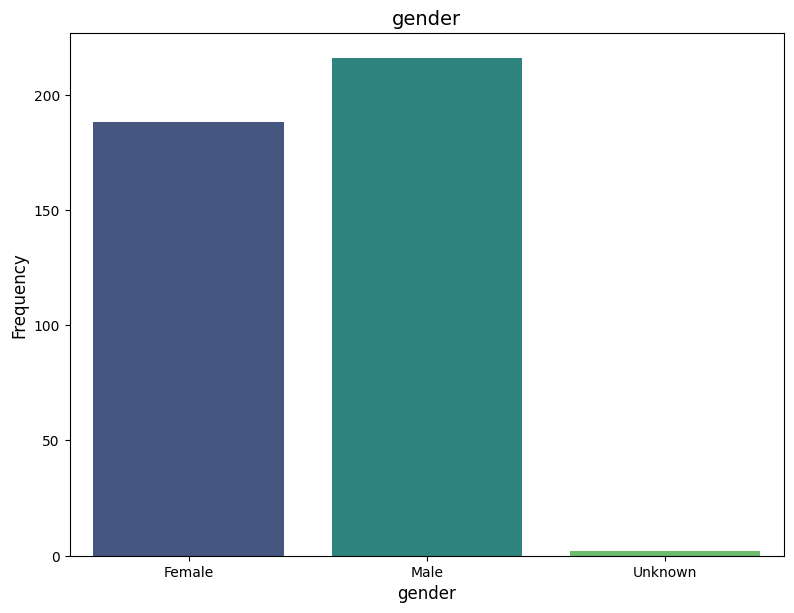

In [258]:
plot_categorical_countplot(df,'gender')

In [187]:
df['high_school_gpa'].fillna(df['high_school_gpa'].median(), inplace=True)

In [207]:
df['year_of_study_2023'].fillna('Unknown', inplace=True)

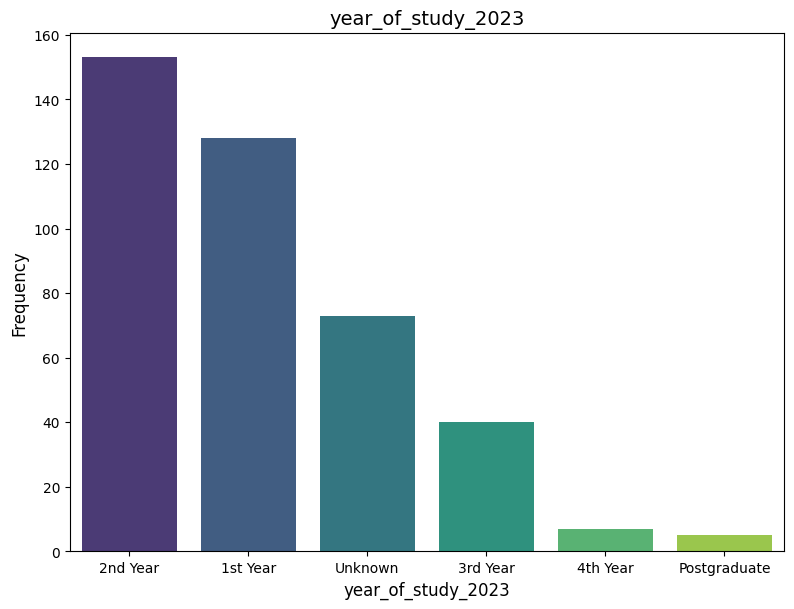

In [322]:
plot_categorical_countplot(df,'year_of_study_2023')

In [223]:
df['faculty']

0              Arts & Social Sciences
1      Economic & Management Sciences
2                        AgriSciences
3                         Engineering
4              Arts & Social Sciences
                    ...              
401                           Science
402    Economic & Management Sciences
403                           Unknown
404    Economic & Management Sciences
405                           Unknown
Name: faculty, Length: 406, dtype: object

In [189]:
df['faculty'].fillna('Unknown', inplace=True)

In [209]:
df['gpa_2023'].fillna(df['gpa_2023'].median(), inplace=True)

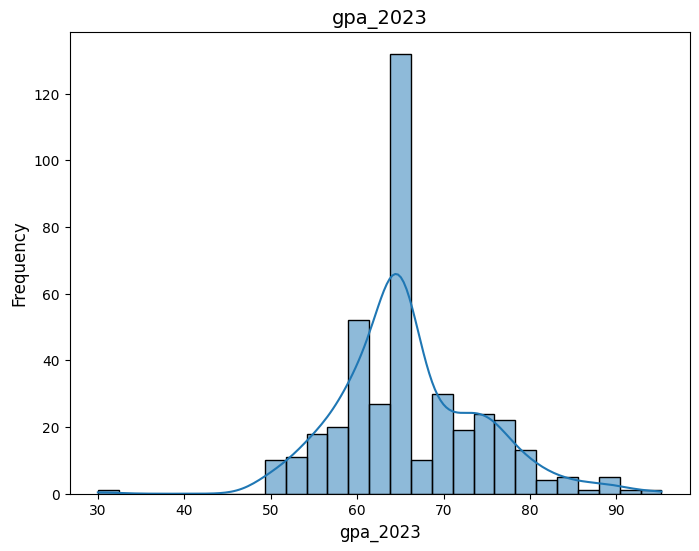

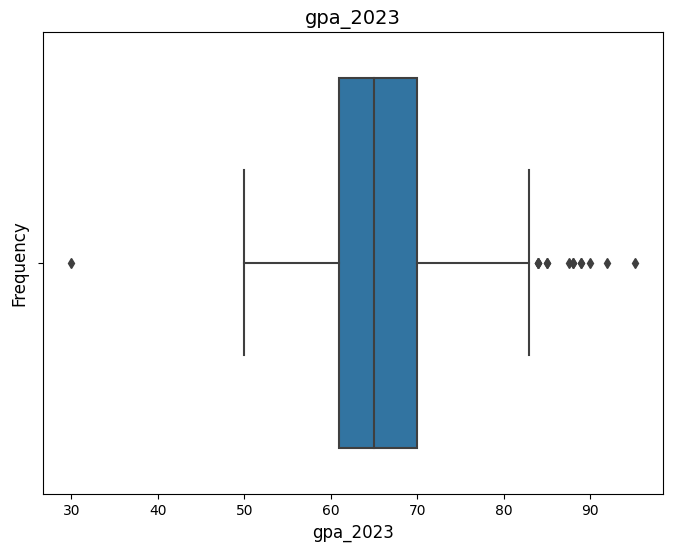

In [217]:
plot_numeric_feature(df,'gpa_2023')

In [191]:
# Evaluación de la categoría
df['accommodation_status_2023'].fillna('Unknown', inplace=True)

In [192]:
df['monthly_allowance_2023'].fillna('Unknown', inplace=True)

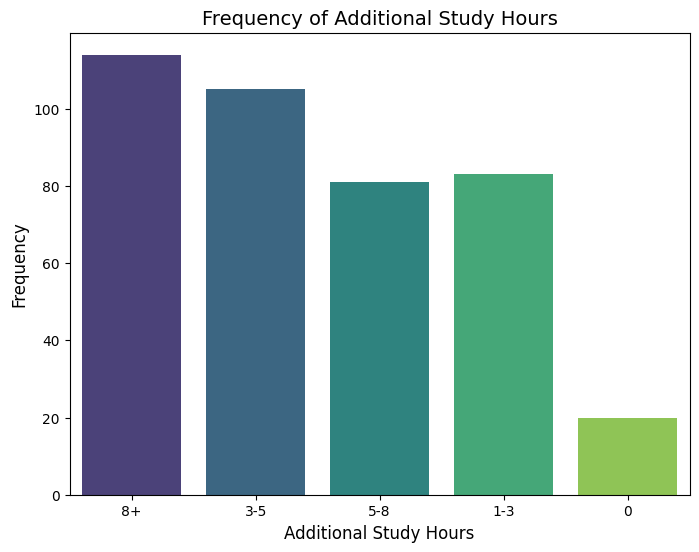

In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='additional_study_hours', palette='viridis')

# Ajusta las etiquetas del eje x
plt.xlabel('Additional Study Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Añade título al gráfico
plt.title('Frequency of Additional Study Hours', fontsize=14)

# Muestra el gráfico
plt.show()

In [194]:
df['additional_study_hours'].fillna('8+', inplace=True)

In [195]:
df.isnull().sum()

survey_timestamp                                                  0
gender                                                            0
high_school_gpa                                                   0
year_of_study_2023                                                0
faculty                                                           0
gpa_2023                                                          0
accommodation_status_2023                                         0
monthly_allowance_2023                                            0
scholarship_2023                                                  8
additional_study_hours                                            0
How often do you go out partying/socialising during the week?     2
alcohol_consumption_per_outing                                    2
alcohol_related_absences                                          3
failed_modules                                                    3
in_a_relationship                               

In [218]:
df['in_a_relationship'].fillna('Unknown', inplace=True)

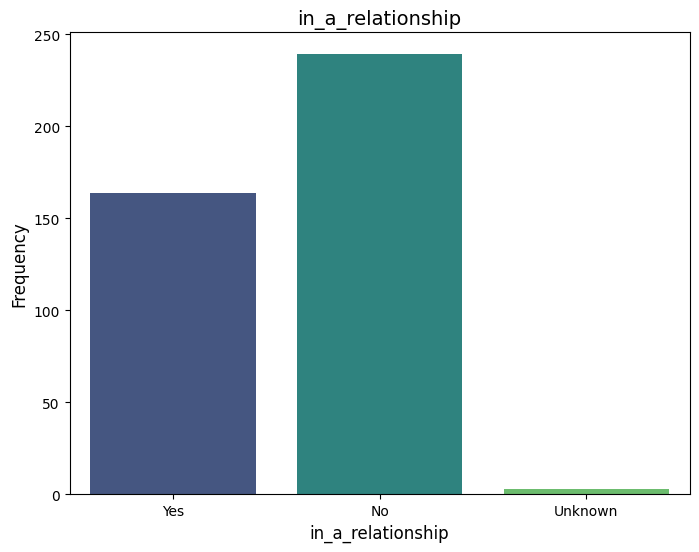

In [219]:
plot_categorical_countplot(df,'in_a_relationship')

In [220]:
df['parental_approval_of_alcohol'].fillna('Unknown', inplace=True)

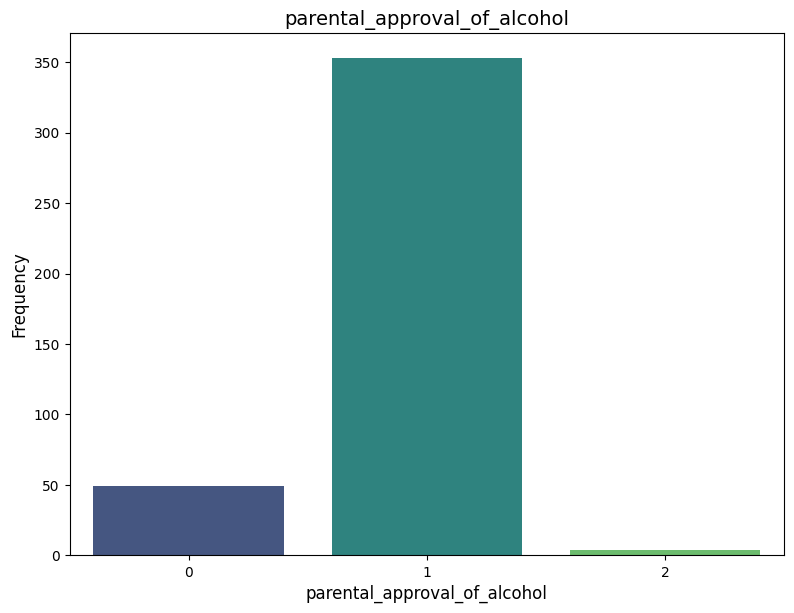

In [320]:
plot_categorical_countplot(df,'parental_approval_of_alcohol')

In [198]:
set(df['parental_approval_of_alcohol'])
mapped_parental_approval_of_alcohol = {"Yes": 1, "No": 0, "Unknown": 2}
df['parental_approval_of_alcohol'] = df['parental_approval_of_alcohol'].map(mapped_parental_approval_of_alcohol)

In [199]:
set(df['parent_relationship_strength'])
df['parent_relationship_strength'].fillna('Unknown', inplace=True)
# mapped_parent_relationship_strength = {"Distant": 0, "Fair": 1, "Close": 2, "Very close": 3, "Unknown":4}
# df['parent_relationship_strength'] = df['parent_relationship_strength'].map(mapped_parent_relationship_strength)

In [200]:
set(df['parent_relationship_strength'])

{'Close', 'Distant', 'Fair', 'Unknown', 'Very close'}

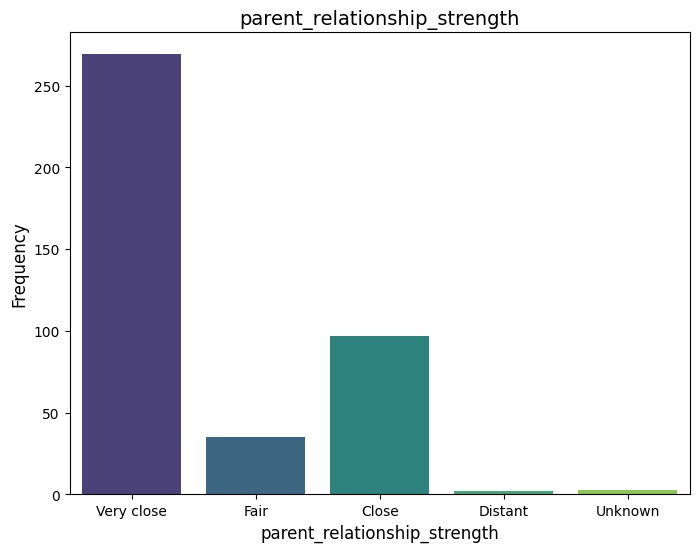

In [224]:
# Como es la relación con los padres
plot_categorical_countplot(df,'parent_relationship_strength')

## Próximos pasos
Una vez limpiados los datos y conociendo nuestro dataset con gráficos, vamos a plantear algunas hipótesis y elegir las variables relevantes para el problema.

### Hipótesis:

- La carrera tiene impacto en las notas del estudiante -> En carreras de ciencias exactas las notas tienden a ser más bajas

- Las becas juegan un papel importante. Mientras más beneficios recibe el alumno, mejor son sus calificaciones. Variables relacionadas (scholarship)

- Wkly study hours: La cantidad de horas que el alumno estudia por semana esta relacionado directamente con sus calificaciones

- Cuantas días de socialización tiene el alumno por semana. A mayor cantidad de días, peor serán sus calificaciones

- A mayor cantidad de tragos por noche, sus notas serán más bajas.

- missed classes: Cuantas más clases pierda el alumno, peor serán sus calificaciones

- Failed_modules: Cuanto mayor sea la cantidad de modulos desaprobados, peor tienden a ser sus calificaciones

- Si un alumno está en una relación, peor serán sus calificaciones

- Parent_strength: Si el alumno es más pegado a sus padres, mejor será su calificación

### Correlación de variables
Analizaremos el impacto que tiene el tipo de carrera con la nota general del alumno.
Al ser una variable continua se puede contrastar con un diagrama de cajas

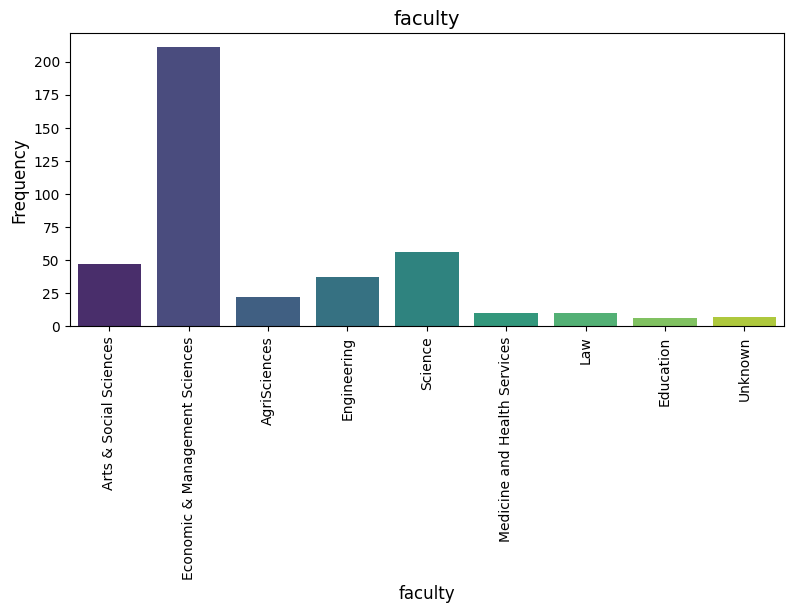

In [259]:
plot_categorical_countplot(df,'faculty',90)

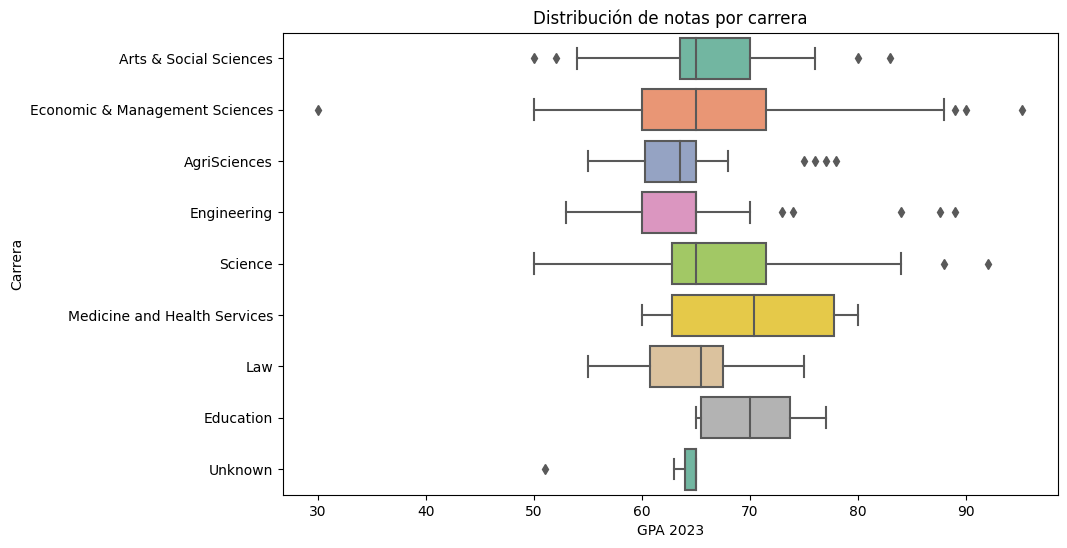

In [303]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gpa_2023', y='faculty', data=df, orient='h', palette='Set2')
plt.title('Distribución de notas por carrera')
plt.xlabel('GPA 2023')
plt.ylabel('Carrera')
plt.show()

In [281]:
# Agrupar df.groupby(["faculty","gender"]).size().to_frame(name='count').reset_index()

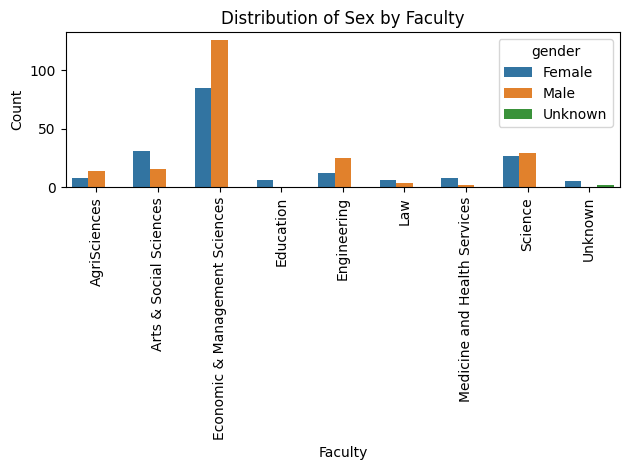

In [323]:
gender_by_faculty = df.groupby(["faculty","gender"]).size().to_frame(name='count').reset_index()

# Create a bar chart using Seaborn
sns.barplot(x="faculty", y="count", hue="gender", data=gender_by_faculty)

# Customize the plot (optional)
plt.xlabel("Faculty")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Distribution of Sex by Faculty")
plt.tight_layout()  # Adjust spacing after rotation

# Show the plot
plt.show()

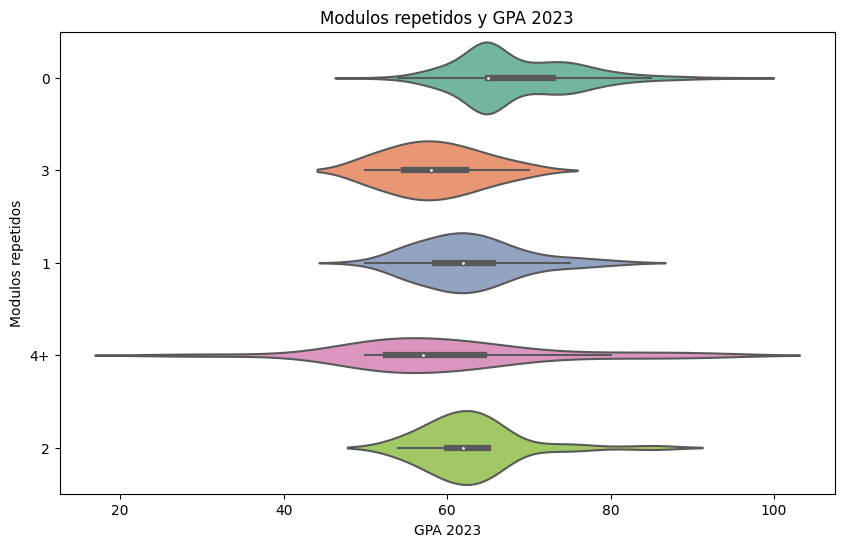

In [373]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='gpa_2023', y='failed_modules', data=df, orient='h', palette='Set2')

plt.title('Modulos repetidos y GPA 2023')
plt.xlabel('GPA 2023')
plt.ylabel('Modulos repetidos')
plt.show()


### Hipótesis: Las becas influyen positivamente en las notas del alumno

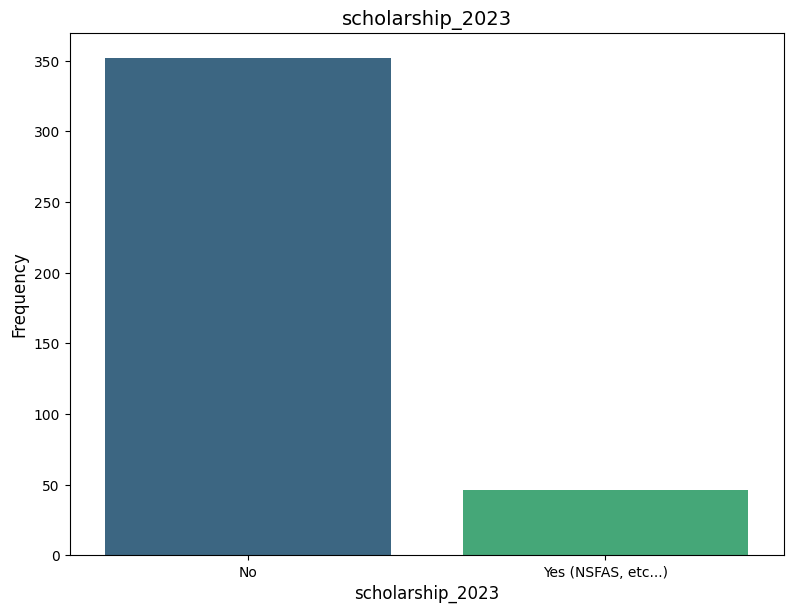

In [310]:
plot_categorical_countplot(df,'scholarship_2023')

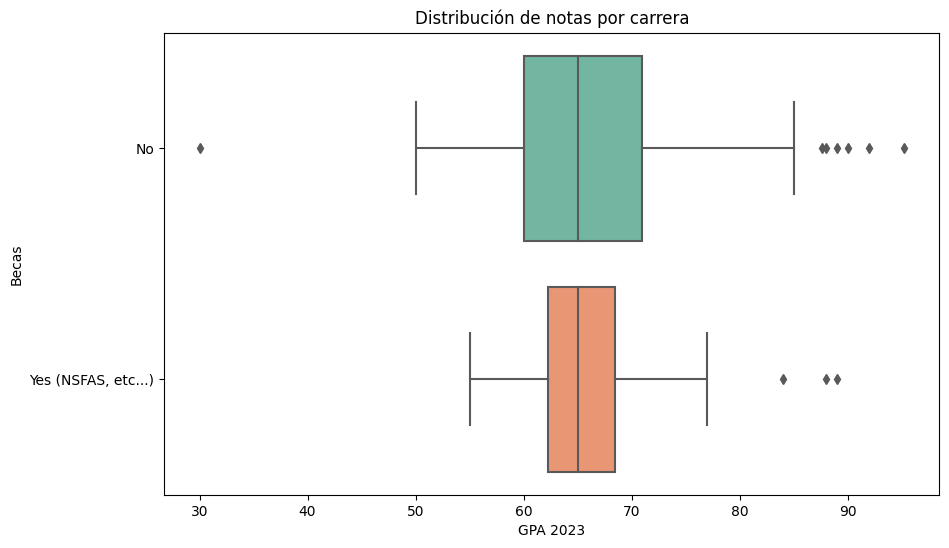

In [312]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gpa_2023', y='scholarship_2023', data=df, orient='h', palette='Set2')
plt.title('Distribución de notas por carrera')
plt.xlabel('GPA 2023')
plt.ylabel('Becas')
plt.show()

In [375]:
scolarship_by_parent_relationship = df.groupby(["scholarship_2023","parent_relationship_strength"]).size().to_frame(name='count').reset_index()
scolarship_by_parent_relationship

,scholarship_2023,parent_relationship_strength,count
0,No,Close,82
1,No,Fair,29
2,No,Unknown,1
3,No,Very close,240
4,"Yes (NSFAS, etc...)",Close,12
5,"Yes (NSFAS, etc...)",Distant,2
6,"Yes (NSFAS, etc...)",Fair,6
7,"Yes (NSFAS, etc...)",Very close,26


In [388]:
becados_buena_relacion = df.query("scholarship_2023 == 'Yes (NSFAS, etc...)' and parent_relationship_strength=='Very close' ")
becados = df.query("scholarship_2023 == 'Yes (NSFAS, etc...)'")
becados_buena_relacion
# Calcula el porcentaje
porcentaje = (len(becados_buena_relacion) / len(becados)) * 100

print(f"Porcentaje de alumnos con beca y buena relación con sus padres: {porcentaje:.2f}%")

Porcentaje de alumnos con beca y buena relación con sus padres: 56.52%


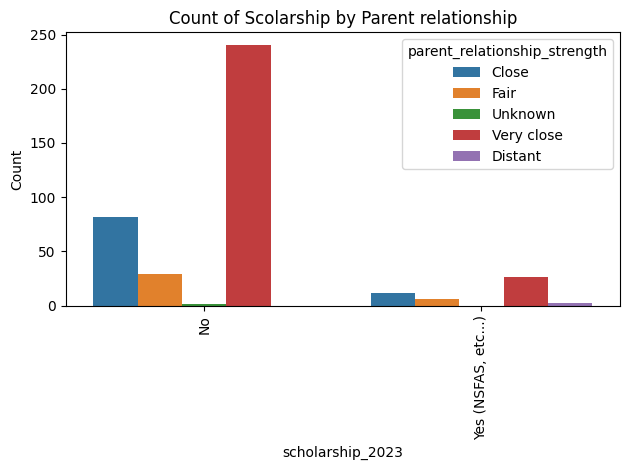

In [374]:
# grafico de barras de becas agrupado por parent_relationship
sns.barplot(x="scholarship_2023", y="count", hue="parent_relationship_strength", data=scolarship_by_parent_relationship)

# Customize the plot (optional)
plt.xlabel("scholarship_2023")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Count of Scolarship by Parent relationship")
plt.tight_layout()  # Adjust spacing after rotation

# Show the plot
plt.show()

**Conclusión: A priori se ve que no pero el resultado no es concluyente ya que aproximadamente solo el 8% de los estudiantes de nuestro conjunto tiene becas**

### Está el alumno en una relación

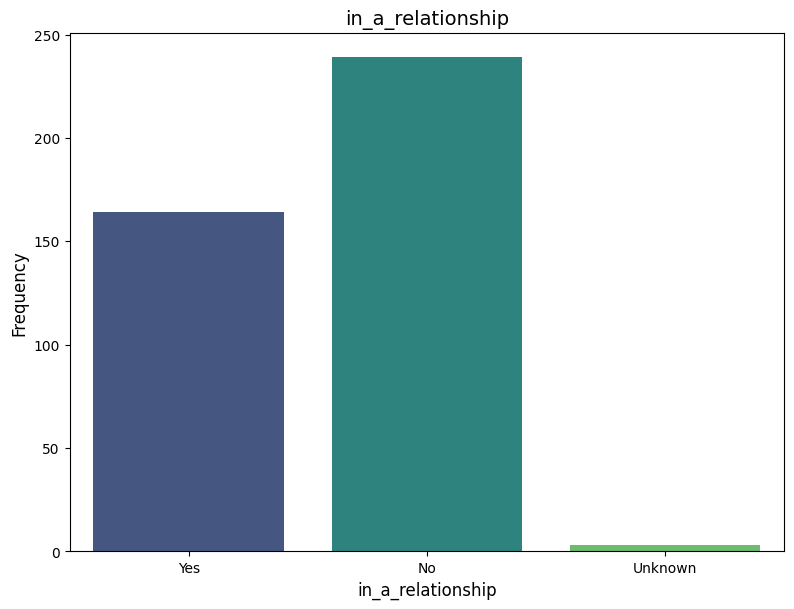

In [326]:
plot_categorical_countplot(df,'in_a_relationship')

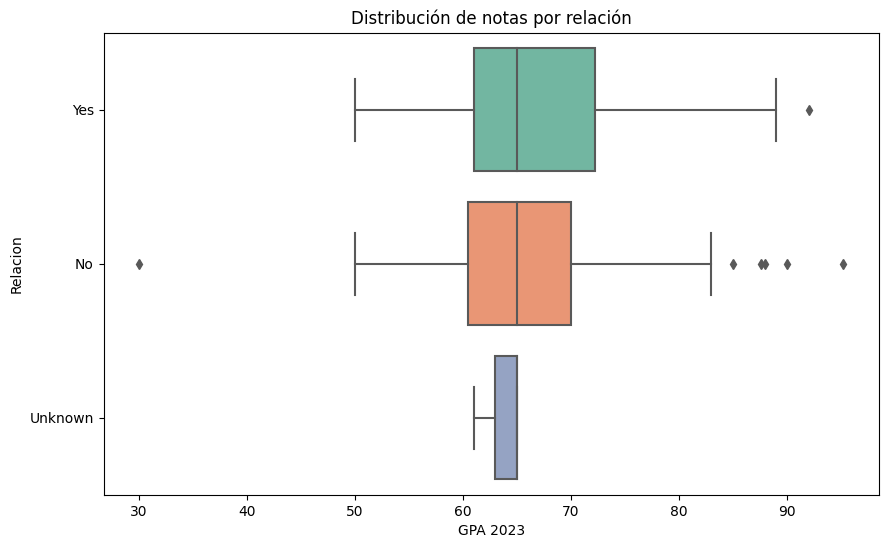

In [393]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gpa_2023', y='in_a_relationship', data=df, orient='h', palette='Set2')
plt.title('Distribución de notas por relación')
plt.xlabel('GPA 2023')
plt.ylabel('Relacion')
plt.show()

In [394]:
df

,survey_timestamp,gender,high_school_gpa,year_of_study_2023,faculty,gpa_2023,accommodation_status_2023,monthly_allowance_2023,scholarship_2023,additional_study_hours,How often do you go out partying/socialising during the week?,alcohol_consumption_per_outing,alcohol_related_absences,failed_modules,in_a_relationship,parental_approval_of_alcohol,parent_relationship_strength
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,1,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,1,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,1,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,1,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,1,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,2024/03/12 11:05:33 am EET,Female,74.0,Unknown,Science,65.0,Private accommodation/ stay with family/friends,Unknown,No,3-5,3,1-3,0,0,No,1,Close
402,2024/03/12 3:26:14 pm EET,Female,73.0,2nd Year,Economic & Management Sciences,58.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,"Yes (NSFAS, etc...)",5-8,1,8+,0,0,Yes,1,Very close
403,2024/03/13 10:32:19 pm EET,Female,86.0,1st Year,Unknown,65.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,5-8,2,3-5,1,0,No,1,Very close
404,2024/03/13 10:32:27 pm EET,Male,85.0,Unknown,Economic & Management Sciences,65.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,4+,5-8,4+,0,No,1,Close


In [343]:
df_in_relationship = df.loc[df["in_a_relationship"] == 'Yes']
df_no_relationship = df.loc[df["in_a_relationship"] == 'No']

In [397]:
# df_in_relationship.describe()

In [398]:
# df_no_relationship.describe()

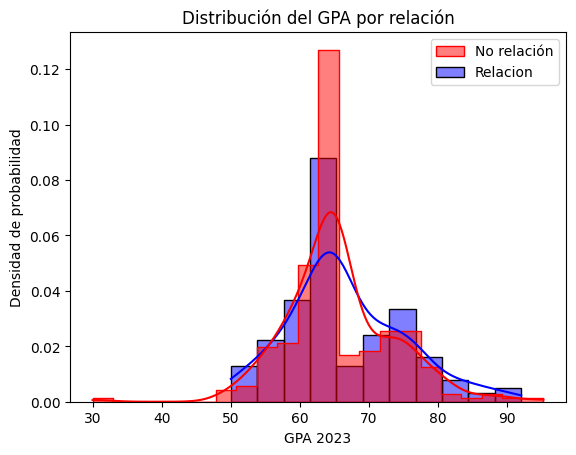

In [353]:
sns.histplot(data=df_in_relationship, x="gpa_2023", color="blue", label="Relacion", stat="density", kde=True)
sns.histplot(data=df_no_relationship, x="gpa_2023", color="red", label="No relación", stat="density", element="step", kde=True)

# Personaliza el título y las etiquetas
plt.title("Distribución del GPA por relación")
plt.xlabel("GPA 2023")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()

In [369]:
# Consumo de alcohol en salidas

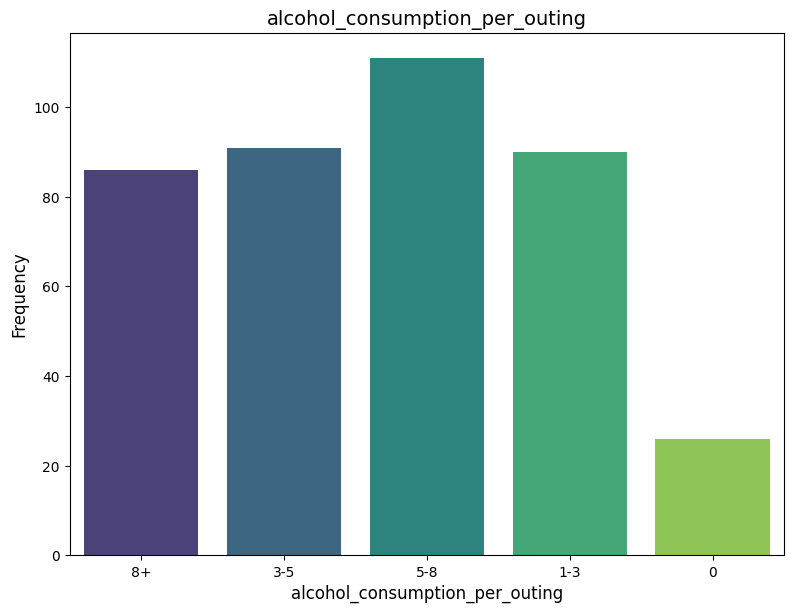

In [367]:
plot_categorical_countplot(df, 'alcohol_consumption_per_outing')

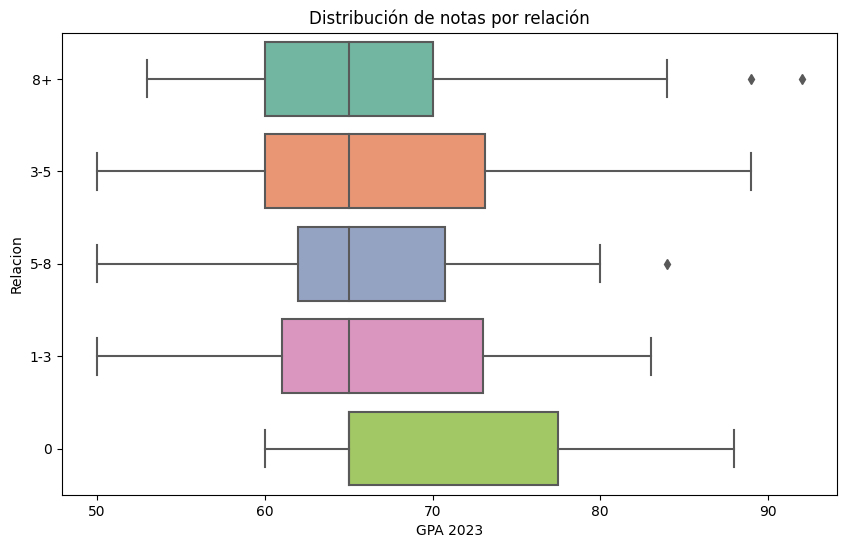

In [399]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gpa_2023', y='alcohol_consumption_per_outing', data=df_in_relationship, orient='h', palette='Set2')
plt.title('Distribución de notas por relación')
plt.xlabel('GPA 2023')
plt.ylabel('Relacion')
plt.show()

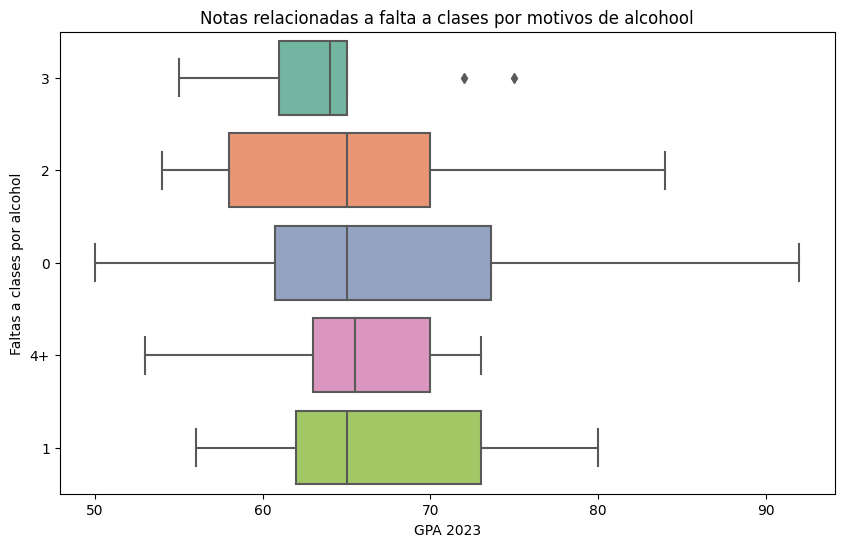

In [405]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gpa_2023', y='alcohol_related_absences', data=df_in_relationship, orient='h', palette='Set2')
plt.title('Notas relacionadas a falta a clases por motivos de alcohool')
plt.xlabel('GPA 2023')
plt.ylabel('Faltas a clases por alcohol')
plt.show()

<AxesSubplot: xlabel='gender', ylabel='count'>

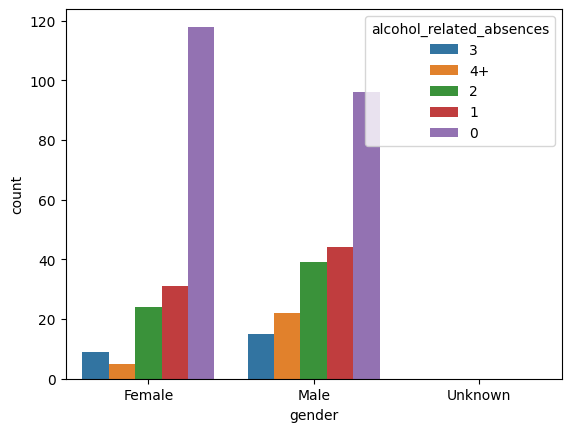

In [413]:
sns.countplot(x="gender", hue="alcohol_related_absences", data=df)

# Conclusión preliminar

- Las muestras son pequeñas por lo que a priori necesitariamos un conjunto más amplio para hacer un análisis detallado

> No confundir con técnicas de oversampling o undersampling

- Aplicar un análisis de correlación no tendría mucho sentido para la cantidad baja de muestras que tenemos

- Sería interesante tener datos socieconómicos y de IQ ya que son factores que pueden influir mucho en gpa